In [2]:
#%matplotlib tk
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

Calculation of the motion of a mass $m$ orbiting another mass $M$ in a central force field. The attractive central force is defined as follows:
$$F(r)=-(1+\alpha){k\over r^{2+\alpha}}$$
where $r$ is the distance between the two masses. If the parameter $\alpha$ is zero, then Keplerian orbits result. For small non-zero values of $\alpha$ the orbits still look approximately elliptical, but they do not close, resulting in what looks like a precessing ellipse. The program plots the orbit of the relative position vector $\vec r = \vec r_2-\vec r_1$ as well as the separate orbits for $\vec r_1$ and $\vec r_2$.

In the following, an interesting scale for the angular momentum is that of a circular orbit, which is easy to calculate by setting the central force equal to the mass times centripetal acceleration. The result is
$$L_c=\sqrt{\mu k (1+\alpha) r^{1-\alpha}}$$
where $\mu$ is the reduced mass:
$$\mu={Mm\over M+m}$$

The integration is done from differential equations derived from this Lagrangian:
$$L={1\over 2}\mu\left(\dot r^2 + r^2\dot\phi^2\right) - U(r)$$
The Lagrange equations are, after turning the radial 2nd-order equation into two 1st-order equations:
$${dr\over dt}=v_r$$

$${dv_r\over dt}={1\over \mu}F_r + {\ell^2\over\mu^2 r^3}$$

$${d\phi\over dt}={\ell\over \mu r^2}$$

These three equations are coded into the function dudt below.

In [7]:
# This is an example of using Python calculate and plot the motion of a a mass
# orbiting another in a central force field.
# Order of variables in the array u[]:
#    0: r  
#    1: v_r
#    2: phi  

# Parameters describing the system.
k = 1.0                    # force constant
Mass = 2.0                 # first mass
mass = 1.0                 # second mass
mu = Mass*mass/(Mass+mass) # reduced mass
alpha = -0.1

# Assign initial conditions to the motion.
r0 = 4.0
rdot0 = 0.
phi0 = 0.
Lc = math.sqrt(mu*pow(r0,1.0-alpha)*(1.0+alpha)*k) # Angular momentum for a circular orbit
L = 0.5*Lc   # Conserved angular momentum
u0 = [r0, rdot0, phi0]  # initial conditions for all 3 variables
print("Initial radius = " + str(r0) + " m")
print("Initial radial speed = " + str(rdot0) + " m/s")
print("Initial angle = " + str(phi0) + " radians")
print("Initial angular momentum = " + str(L) + " kg meters-squared / second")
print ("Angular momentum for a circular orbit = " + str(Lc) + " kg meters-squared / second")

Initial radius = 4.0 m
Initial radial speed = 0.0 m/s
Initial angle = 0.0 radians
Initial angular momentum = 0.8301921542620245 kg meters-squared / second
Angular momentum for a circular orbit = 1.660384308524049 kg meters-squared / second


In [8]:
# Define the central force function
def F(r):
    return -(1.0+alpha)*k/pow(r,2.0+alpha)


In [9]:
# This function gives the time derivative of each of the 3 variables. These follow from the Lagrange equations of motion,
# taking into account the fact that phi is ignorable, so that pphi=L is constant.
def dudt(u, t):
    r = [0., 0., 0.] 
    r[0] = u[1]
    r[1] = L*L/(mu*mu*pow(u[0],3)) + F(u[0])/mu
    r[2] = L/(mu*u[0]*u[0])
    return r

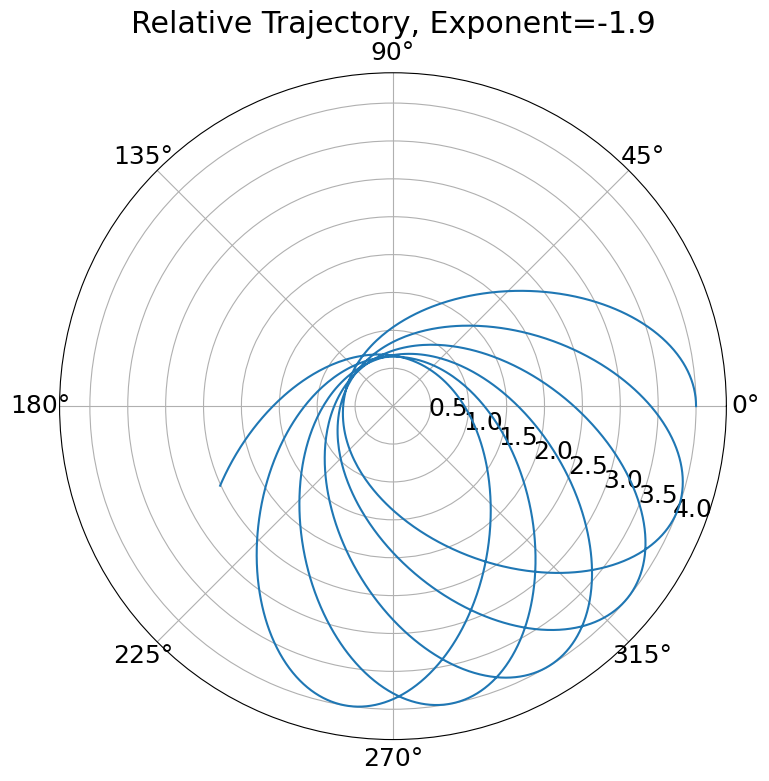

In [10]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
t0 = 0.                   # start time
t1 = 100.                  # end time
N = 3200                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

# Use pyplot from matplotlib to plot the relative trajectory
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.set_rlabel_position(-22.5)
ax.plot(u[...,2],u[...,0])
ax.set_rmax(1.1*r0)
plt.tight_layout()
plt.title('Relative Trajectory, Exponent=-'+str(2+alpha))
plt.show()

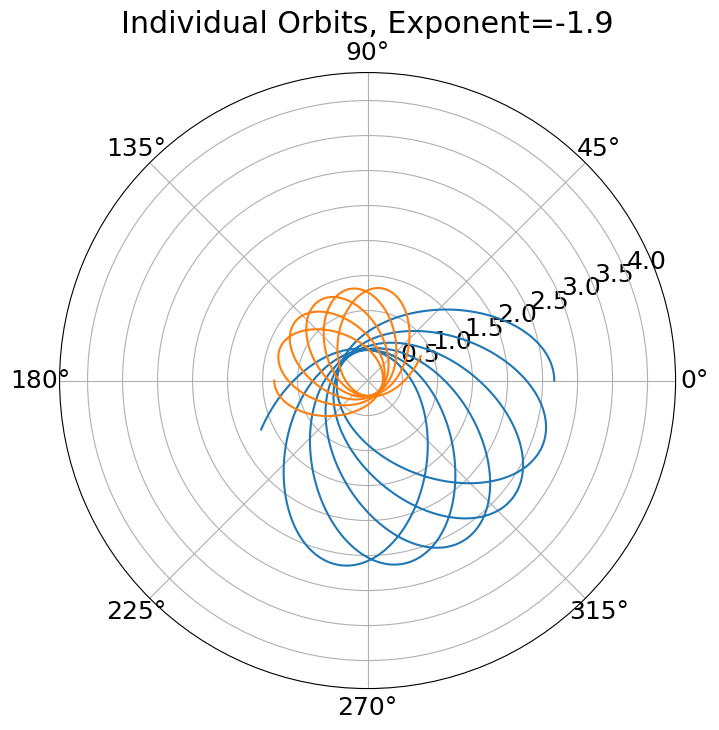

In [11]:
# Plot the individual orbits
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.plot(u[...,2],(Mass/(Mass+mass))*u[...,0])
ax.plot(u[...,2]+math.pi,(mass/(Mass+mass))*u[...,0])
ax.set_rmax(1.1*r0)
plt.title('Individual Orbits, Exponent=-'+str(2+alpha))
plt.show()

C:\Users\rjohn\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\rjohn\AppData\Local\Temp\ipykernel_23240\884386040.py:19: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pnt1.set_data(u[i,2],(Mass/(Mass+mass))*u[i,0])
C:\Users\rjohn\AppData\Local\Temp\ipykernel_23240\884386040.py:20: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pnt2.set_data(u[i,2]+math.pi,(mass/(Mass+mass))*u[i,0])


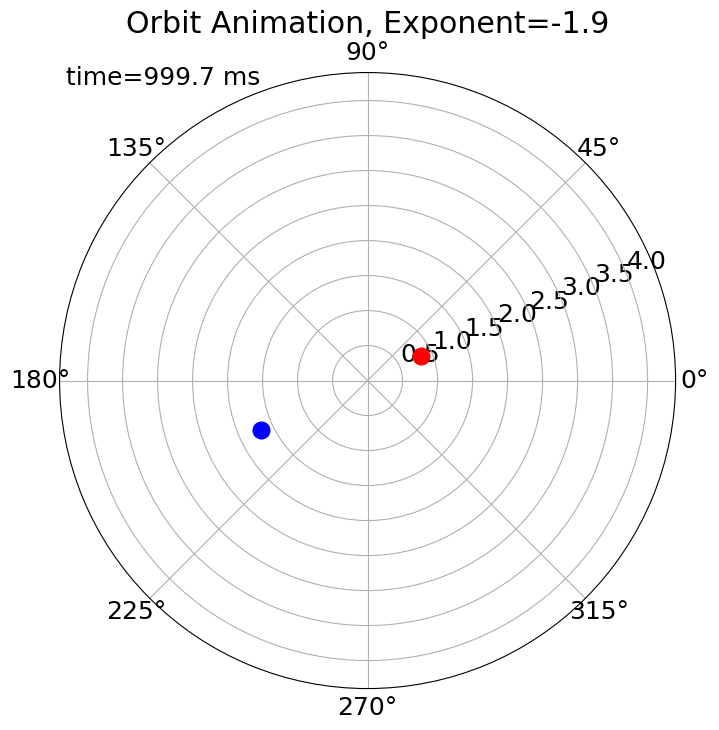

In [9]:
# Now use matplotlib to make an animation of the motion

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
pnt1, = ax.plot([],[],'bo',markersize=12)
pnt2, = ax.plot([],[],'ro',markersize=12)
ax.set_rmax(1.1*r0)
plt.title('Orbit Animation, Exponent=-'+str(2+alpha))
time_text = ax.text(0.01, 0.98, '', transform=ax.transAxes)
time_step = 10.*(t1-t0)/N

def init():
    pnt1.set_data([],[])
    pnt2.set_data([],[])
    time_text.set_text('')
    return pnt1, pnt2, time_text

def animate(i):
    pnt1.set_data(u[i,2],(Mass/(Mass+mass))*u[i,0])
    pnt2.set_data(u[i,2]+math.pi,(mass/(Mass+mass))*u[i,0])
    time = i*time_step
    time_text.set_text('time=%.1f ms' % time)
    return pnt1, pnt2, time_text

# The animation is created here    
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=time_step, blit=False)

# Save the animation to an mpeg file. This requires ffmpeg to be installed,
# with the executable in the PATH
anim.save('TwoBody.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
   
# Display the animation
plt.show()